In [3]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px


In [ ]:
import pandas as pd
import numpy as np
from 

In [1]:
from sklearn.datasets import load_boston


In [2]:
x = pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
y= pd.Series(load_boston().target)

NameError: name 'pd' is not defined

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)


# with PCA

In [76]:
std_scalar = StandardScaler()
std_arr = std_scalar.fit_transform(x_train)
df_std = pd.DataFrame(std_arr,columns=x_train.columns)
df_std.head(2)

pca=PCA(n_components=None)
x_train_pca = pca.fit_transform(df_std)
pc_name = [f"PC{i}" for i in range(1,x_train.shape[1]+1)]

x_train_pca = pd.DataFrame(x_train_pca,columns=pc_name)

In [77]:
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,5.016174,-1.500917,0.223201,0.800229,-0.153406,-2.043897,2.761636,0.317181,0.187507,-0.685137,0.154275,0.537188,0.108338
1,1.313429,2.405727,0.674547,-1.214780,-1.366738,-0.835459,-0.977152,0.849683,0.672232,0.210408,1.351534,0.206670,0.026846
2,-1.390617,-0.090872,-0.466075,0.569203,-1.209385,-0.509335,-0.239619,0.689917,-0.796940,-0.437356,-0.028647,0.302119,-0.053301
3,3.488983,0.022583,-1.723989,0.800054,-0.759360,-0.421349,-1.453710,-0.781622,0.525252,-1.312562,-0.683145,-0.363261,1.061569
4,2.966487,0.322684,-2.734640,0.934503,-0.738034,-0.720322,-0.319483,-1.305155,0.478853,-0.976432,-0.613092,0.679839,0.160316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-2.755293,1.414494,1.592132,2.680484,1.623723,0.502346,0.069328,0.155795,0.484856,0.049773,-0.287883,0.393702,-0.063862
400,-1.853354,-0.057853,-0.000809,-0.355244,-0.030162,-0.042538,0.489394,-0.509553,0.238001,0.740209,-0.585293,0.450817,-0.374955
401,-3.864192,-2.170379,0.353008,1.548547,-0.831986,-1.033142,-0.730739,-0.345720,0.265155,-0.037040,0.333644,-0.213050,0.030291
402,-1.272249,-0.046895,-0.758148,-0.469337,0.591540,0.571939,0.243513,0.277123,0.057808,0.063079,0.173379,0.099670,-0.051462


# model training

#### with pca

In [78]:
lr1 =LinearRegression()
lr1.fit(x_train_pca,y_train)
lr1.score(x_train_pca,y_train)

0.7323419940116793

#### without pca

In [79]:
lr2 =LinearRegression()
lr2.fit(x_train,y_train)
lr2.score(x_train,y_train)

0.7323419940116792

In [80]:
# from above observation there is no effect of pca>>bcz >>
# conclusion >> we are providing same number of columns

In [81]:
# Note>> we will use n_componet for to check accuracy to each pca


In [82]:
std_scalar = StandardScaler()
std_arr = std_scalar.fit_transform(x_train)
df_std = pd.DataFrame(std_arr,columns=x_train.columns)


list_score = []
for i in range(1,df_std.shape[1]+1):
    pca=PCA(n_components=i)
    x_train_pca = pca.fit_transform(df_std)
    pc_name = [f"PC{i}" for i in range(1,x_train_pca.shape[1]+1)]
    x_train_pca = pd.DataFrame(x_train_pca,columns=pc_name)
    
    # Linear model
    lr1 =LinearRegression()
    lr1.fit(x_train_pca,y_train)
    list_score.append(lr1.score(x_train_pca,y_train))
list_score

[0.3715033390803556,
 0.46244374204178595,
 0.6137057646114532,
 0.6617522440013042,
 0.6828157596999151,
 0.683695612692141,
 0.6845795813458437,
 0.6916784894840715,
 0.6944407814160827,
 0.7004836375785153,
 0.7210503306863237,
 0.7252928154054101,
 0.7323419940116793]

# KNN_model

In [83]:
std_scalar = StandardScaler()
std_arr = std_scalar.fit_transform(x_train)
df_std = pd.DataFrame(std_arr,columns=x_train.columns)


list_score = []
for i in range(1,df_std.shape[1]+1):
    pca=PCA(n_components=i)
    x_train_pca = pca.fit_transform(df_std)
    pc_name = [f"PC{i}" for i in range(1,x_train_pca.shape[1]+1)]
    x_train_pca = pd.DataFrame(x_train_pca,columns=pc_name)
    
    # knn model
    knn =KNeighborsRegressor()
    knn.fit(x_train_pca,y_train)
    list_score.append(knn.score(x_train_pca,y_train))
list_score

[0.5057511097129648,
 0.721771635433994,
 0.7614501950717681,
 0.794050803803853,
 0.8012032693285052,
 0.8037555723864906,
 0.8041977301351609,
 0.8133511242055265,
 0.8063056990452455,
 0.8194847823798285,
 0.8267199510752453,
 0.8246421872196766,
 0.8268166024399742]

In [84]:
len(list_score)

13

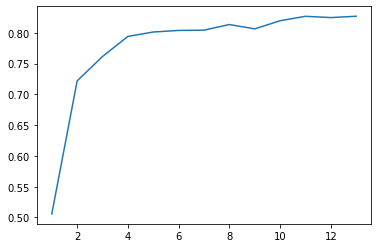

In [85]:
plt.plot(range(1,14),list_score)

In [91]:
std_scalar = StandardScaler()
std_arr = std_scalar.fit_transform(x_train)
df_std = pd.DataFrame(std_arr,columns=x_train.columns)
df_std.head(2)

pca=PCA(n_components=10)
x_train_pca = pca.fit_transform(df_std)
pc_name = [f"PC{i}" for i in range(1,x_train_pca.shape[1]+1)]

x_train_pca = pd.DataFrame(x_train_pca,columns=pc_name)


knn =KNeighborsRegressor()
knn.fit(x_train_pca,y_train)
knn.score(x_train_pca,y_train)

0.8194847823798285